<a href="https://colab.research.google.com/github/tg1702/detecting-sms-spam/blob/main/SMS_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np

In [99]:
df = pd.read_csv('https://raw.githubusercontent.com/tg1702/hello-world/main/spam.csv')


In [100]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [101]:
# Cleaning data

df.info()
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [102]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [103]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [104]:
# Encodes spam as 1, ham as 0
df['target'] = encoder.fit_transform(df['target'])

In [105]:
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


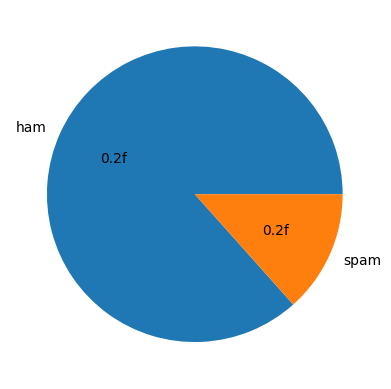

In [106]:
# Visualising Dataset

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="0.2f")
plt.show()

In [107]:
!pip install nltk

In [108]:
import nltk

In [109]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [174]:
# Find and add the number of characters in each message to dataframe
df['num_characters'] = df['text'].apply(len)

In [111]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [112]:
# Find and add the number of words in each message to dataframe
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_words, Length: 5572, dtype: int64

In [113]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [114]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

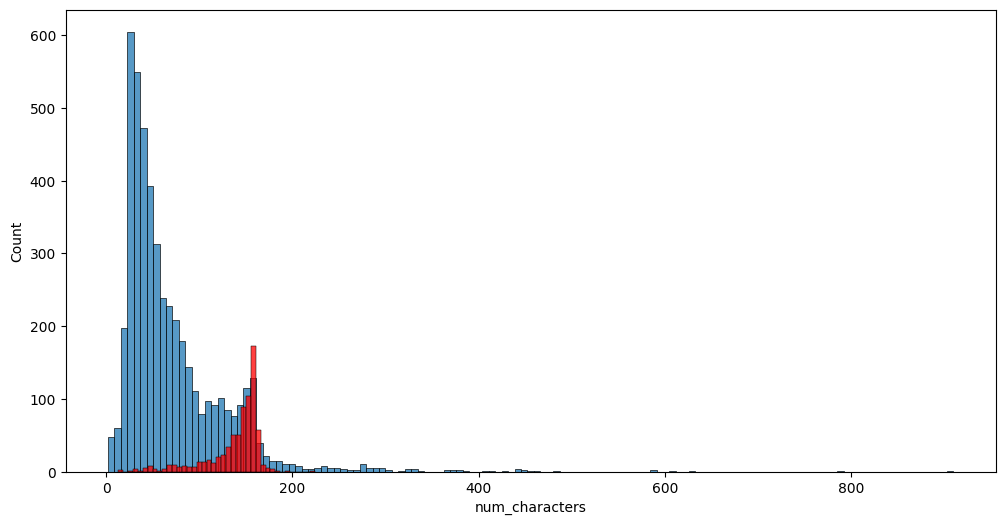

In [115]:
plt.figure(figsize=(12,6))

# Plot Ham in blue
sns.histplot(df[df['target'] == 0]['num_characters'])

# Plot Spam in red
sns.histplot(df[df['target'] == 1]['num_characters'], color="red")

<ipython-input-117-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

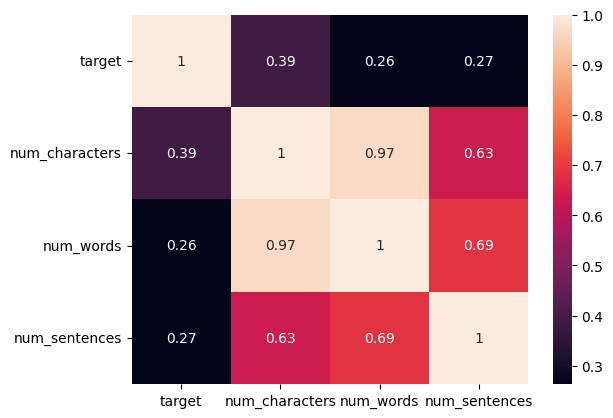

In [117]:
# Visualise correlations between variables
sns.heatmap(df.corr(), annot=True)

In [173]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [149]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for char in text:
    if char.isalnum() and char not in stopwords.words('english') and char not in string.punctuation:
      y.append(char)

  text = y[:]

  y.clear()

  for char in text:
    y.append(ps.stem(char))
  return " ".join(y)

In [151]:
transform_text("I loved the YT lectures on Machine Learning. How about you?")

'love yt lectur machin learn'

In [152]:
# Add transfored text to dataframe
df['transformed_text'] = df['text'].apply(transform_text)

In [153]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [154]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

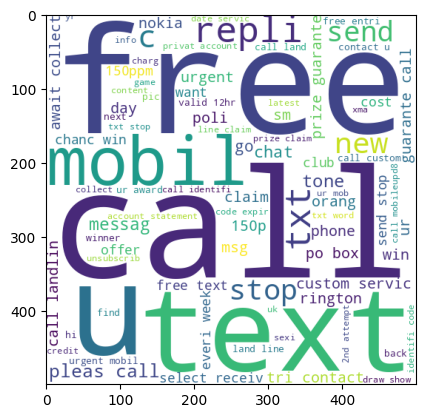

In [155]:
plt.imshow(spam_wc)

In [158]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [159]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

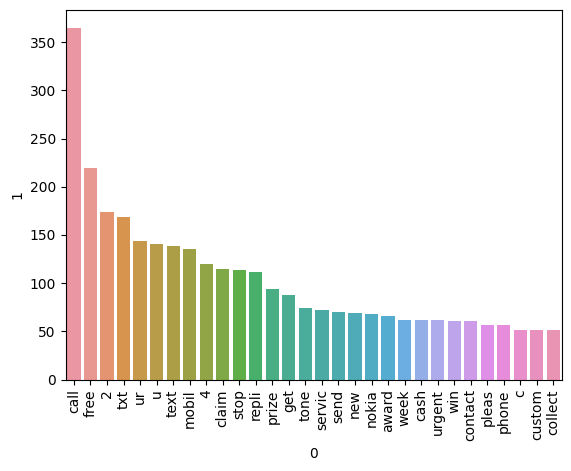

In [161]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [162]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

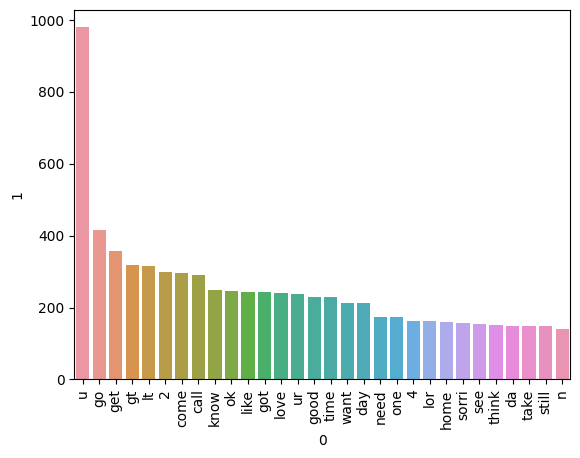

In [163]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [134]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [135]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [164]:
y = df['target'].values

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [167]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [168]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [169]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

In [143]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

0.9713004484304932
[[942  15]
 [ 17 141]]
0.9038461538461539


In [171]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

In [172]:
data = {
    "Model": ["BNB", "MNB", "GNB"],
    "Accuracy": [accuracy_score(y_test, y_pred3), accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred1)],
    "Precision": [precision_score(y_test, y_pred3), precision_score(y_test, y_pred2), precision_score(y_test, y_pred1)]
}

In [146]:
pd.DataFrame(data=data)

,Model,Accuracy,Precision
0,BNB,0.969507,0.992063
1,MNB,0.971300,0.903846
2,GNB,0.873543,0.534694


In [147]:
import pickle
pickle.dump(cv, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))